## positioning a scale bar with relative postions 
it automatically finds the nearest scalebar using [1,2,5] as starting digits
only params to set are: 

(once)
- relative right edge distance := scalebar_right_edge_k
- relative bottom edge distance := scalebar_bot_pos_k  -----   can be set to 1-scalebar_right_edge_k for symmetry
- relative scalebar height := scalebar_height_k

(by case)
- mu_per_plx or ydim := H_i
- length unit




In [240]:
import numpy as np
#  *_m stand for length unit
#  *_i stands for int/pxl/index
#  *_k satnds for relative to whole image


# this has to be set by user
mu_per_pxl = 0.03  # µm/pxl
unit = 'µm'# is written in the plot

# put image dims here
W_i = 300 #xdim  # width of the image in pxl
H_i = 200 #ydim  # Height of the image in pxl

# which one is given?
W_m_given = True
mu_per_pxl_given = np.invert(W_m_given)
if W_m_given:
    W_m = 80 #µm
    mu_per_pxl = W_m/W_i

elif mu_per_pxl_given:
    mu_per_pxl = 0.03
    W_m = W_i * mu_per_pxl

# set the scale
suggested_relative_scalebar_width = 0.1
allowed_first_digit = np.array([1,2,5,10]) # the 10 in here is important (the numbersystem fliping point or whaterver its called)

suggested_scale_m = ( 10**int('{:.0e}'.format(W_m * suggested_relative_scalebar_width)[2:]) 
                     * allowed_first_digit[
                         np.abs(int('{:.0e}'.format(W_m * suggested_relative_scalebar_width)[0])-allowed_first_digit).min()
                         == np.abs(int('{:.0e}'.format(W_m * suggested_relative_scalebar_width)[0])-allowed_first_digit)
                     ][0]
                    )
scale_m = suggested_scale_m
scale_i = scale_m/mu_per_pxl
print('scale_m = {} {}    from {}'.format(scale_m, unit, W_m * suggested_relative_scalebar_width))


#set scalebar position
scalebar_right_edge_k = 0.93
scalebar_bot_pos_k = 1-scalebar_right_edge_k # 0.07 
scalebar_height_k = 0.03
scalebar_height_i = H_i * 0.03   # here one has to figure out how linewidth is related to pxlsize in e.g. QT
scalebar_length_i = scale_m / mu_per_pxl
left_scale_x_i = scalebar_right_edge_k * W_i
left_scale_y_i = scalebar_bot_pos_k * H_i + scalebar_height_i/2
right_scale_x_i = scalebar_right_edge_k * W_i - scale_i
right_scale_y_i = scalebar_bot_pos_k * H_i + scalebar_height_i/2
text_x_i = 1/2 * (right_scale_x_i + left_scale_x_i)
text_y_i = left_scale_y_i + scalebar_height_i*2 # relative to height of scalebar
text_size = scalebar_height_i # t# here one has to figure out how fontsize is related to pxlsize in e.g. QT

scale_m = 10 µm    from 8.0


In [241]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

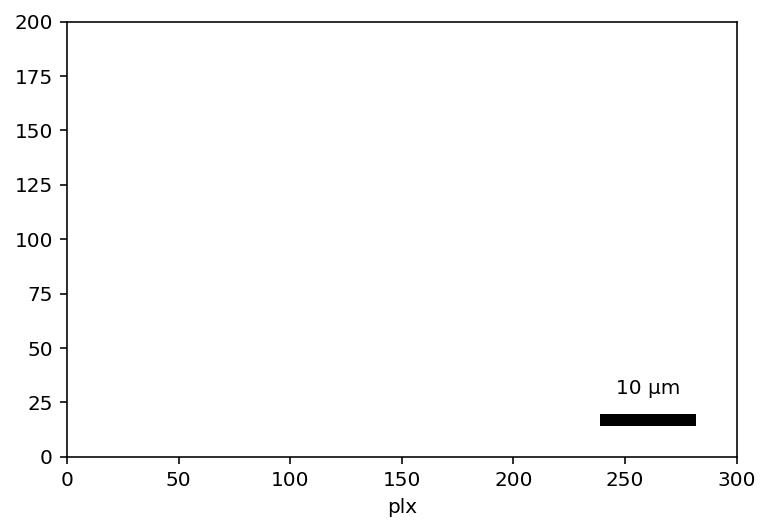

In [242]:

plt.figure()
plt.plot([left_scale_x_i, right_scale_x_i],[left_scale_y_i,right_scale_y_i], lw = scalebar_height_i,c='k')
plt.text(scale_text_x_i, scale_text_y_i,'{} '.format(scale_m)+unit, horizontalalignment = 'center')
plt.xlim(left = 0, right = W_i)
plt.ylim(bottom = 0, top = H_i)
plt.xlabel('plx')

plt.show()